In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
# import matplotlib as plt
import warnings
from utils import *

%matplotlib inline

In [2]:

train = pd.read_csv("data/train.csv")
test =  pd.read_csv("data/test.csv")


In [3]:
all_q = pd.concat([train[['question1', 'question2']], \
        test[['question1', 'question2']]], axis=0).reset_index(drop='index')

In [4]:
all_q = all_q.fillna('')

In [5]:
g = nx.Graph()
g.add_nodes_from(all_q.question1)
g.add_nodes_from(all_q.question2)



In [6]:
# import pickle 

# with open("data/cache/q_dict.pik", 'r') as f:
#     pickle.dump(q_dict,f,pickle.HIGHEST_PROTOCOL)

In [7]:
all_q.shape[0]

2750086

In [8]:
import pickle 
with open("data/cache/q_dict.pik", 'r') as f:
    q_dict = pickle.load(f)

In [13]:
def q1_q2_wm_ratio(row):

    q1 = q_dict[row['question1']]
    q2 = q_dict[row['question2']]
    inter_keys = set(q1.keys()).intersection(set(q2.keys()))
    if(len(inter_keys) == 0): return 0.
    inter_wm = 0.
    total_wm = 0.
    for q,wm in q1.items():
        if q in inter_keys:
            inter_wm += wm
        total_wm += wm
    for q,wm in q2.items():
        if q in inter_keys:
            inter_wm += wm
        total_wm += wm
    if(total_wm == 0.): return 0.
    return float(inter_wm)/total_wm

In [12]:
# from tqdm import tqdm, tqdm_pandas
# tqdm_pandas(tqdm())



0it [00:00, ?it/s]



In [15]:
all_q['q1_q2_wm_ratio'] = all_q.apply(q1_q2_wm_ratio, axis=1, raw=False)

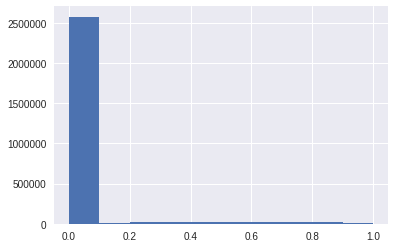

In [17]:
all_q.q1_q2_wm_ratio.hist()

In [ ]:
all_q.to_csv("data/cache/all_q_tmp.csv",index=False)

### ToDo: add weighted edges 

In [7]:
edges = all_q[['question1', 'question2']].to_records(index=False)

In [ ]:
for e in edges:
    

In [5]:
%%time
edges = list(all_q[['question1', 'question2']].to_records(index=False))
g.add_edges_from(edges)

CPU times: user 55.5 s, sys: 572 ms, total: 56.1 s
Wall time: 55.6 s


In [ ]:
pd.read_csv("data/cache/word_match_train.csvo")

In [6]:
g.adjacency_list()

[['How app development?',
  'How I can learn android app development?',
  'How I can learn app development?',
  'How I what can learn android app development?',
  'How real can learn android app development?',
  'How can I create an Android app?',
  'How distinct can learn android app development?',
  'How can I develop android app?'],
 ['How much do companies like Groupon spend on consumer?'],
 ['Why is "Japan\'s Day" unknown in Brunei?'],
 ['Was uk Kyle racist?'],
 ['What is the best magazine for current coconut?'],
 ['Is it ok python eat raw sesame seeds?'],
 ['How much does a genuine conversion leather jacket cost in Sweden?'],
 ['What are the disadvantages wireless communication? What are the advantages?'],
 ['What are the advantages embedded systems?'],
 ['What is difference between continuous and discrete system?',
  'What is difference between continuous and discrete basis?'],
 ['What eye light from stars millions of light years away reaching us?'],
 ['What are the odds that so

In [17]:
def try_apply_dict(x,dict_to_apply):
    return dict_to_apply[x]

In [20]:
%%time
train['page_rank_q1'] = train.question1.apply(lambda x: try_apply_dict(x,pr))
train['page_rank_q2'] = train.question2.apply(lambda x: try_apply_dict(x,pr))

CPU times: user 624 ms, sys: 36 ms, total: 660 ms
Wall time: 600 ms


In [21]:
test['page_rank_q1'] = test.question1.apply(lambda x: try_apply_dict(x,pr))
test['page_rank_q2'] = test.question2.apply(lambda x: try_apply_dict(x,pr))

In [22]:
page_rank_train  = train[['page_rank_q1','page_rank_q2']]

In [23]:
page_rank_test  = test[['page_rank_q1','page_rank_q2']]

In [26]:
page_rank_train.to_csv("data/cache/page_rank_train.csv",index=False)
page_rank_test.to_csv("data/cache/page_rank_test.csv",index=False)
